# Transfer Learning - Fine Tuning of Convolution Model

In [36]:
# Installs tensorflow if there is not installed already.
!pip install tensorflow

C:\Users\skyli\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Users\skyli\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Users\skyli\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


In [37]:
# Imports the helper_functions script.
import extras.helper_functions as hf

In [3]:
# Ignores warnings if continuously showed up.
import warnings
warnings.filterwarnings(action = "once")

# Imports common libraries.
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random, itertools, os, datetime

> ### We will use a 'tensorflow.keras.application' module, getting a pre-build model and combine it with our model.

### Downloads complete dataset zip file

> #### Comment out the following cell, if dataset stored in your machine.

In [4]:
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"
filename = "10_food_classes_all_data.zip"
hf.unzip_data(filename)

--2025-04-15 16:56:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2a00:1450:4001:829::201b, 2a00:1450:4001:82b::201b, 2a00:1450:4001:828::201b, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2a00:1450:4001:829::201b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: '10_food_classes_all_data.zip'

     0K .......... .......... .......... .......... ..........  0%  569K 14m51s
    50K .......... .......... .......... .......... ..........  0%  533K 15m21s
   100K .......... .......... .......... .......... ..........  0% 1,47M 12m6s
   150K .......... .......... .......... .......... ..........  0% 2,44M 9m55s
   200K .......... .......... .......... .......... ..........  0% 2,55M 8m35s
   250K .......... .......... .......... .......... ..........  0% 4,13M 7m29s
   300K .......... .......... .

### Manipulates the directories, paths and files

In [5]:
root_path = "10_food_classes_all_data"
hf.walk_through_dir(dir_path = root_path)

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [6]:
# Sets the paths for training and testing.
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [7]:
hf.print_dir_labels(dir_path = train_dir)

['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


In [8]:
# Initializes some define variables for images.
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Generates "tf.data.Dataset" train and test objects preparing datasets.
train_data = tf.keras.utils.image_dataset_from_directory(directory = train_dir, 
                                                                    image_size = IMAGE_SIZE, 
                                                                    batch_size = BATCH_SIZE, 
                                                                    label_mode = "categorical")
test_data = tf.keras.utils.image_dataset_from_directory(directory = test_dir, 
                                                        image_size = IMAGE_SIZE, 
                                                        batch_size = BATCH_SIZE, 
                                                        label_mode = "categorical")

Found 7500 files belonging to 10 classes.
AttributeError: module 'ml_dtypes' has no attribute 'float4_e2m1fn'
Found 2500 files belonging to 10 classes.


In [9]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [10]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

### Preview a random image

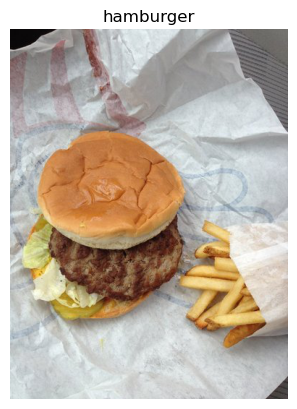

In [11]:
rand_image = hf.random_image(train_dir, train_data.class_names)
img = mpimg.imread(rand_image[1])
plt.imshow(img)
plt.title(f"{rand_image[0]}")
plt.axis(False);

In [12]:
# Getting an example of a batch of data (Images - Labels).
for images, labels in train_data.take(1):
    print(images, labels)

tf.Tensor(
[[[[7.10459137e+01 6.70459137e+01 6.80459137e+01]
   [7.84795914e+01 7.44795914e+01 7.34795914e+01]
   [7.81428604e+01 7.43571396e+01 7.09285736e+01]
   ...
   [1.87673416e+02 2.49540863e+01 4.73265572e+01]
   [2.13168488e+02 3.74285965e+01 6.40765686e+01]
   [2.26214218e+02 3.03722267e+01 6.33263130e+01]]

  [[6.61632614e+01 6.41632614e+01 6.51632614e+01]
   [6.51326523e+01 6.41326523e+01 6.21326523e+01]
   [7.21581650e+01 7.11581650e+01 6.71428604e+01]
   ...
   [2.18791031e+02 3.63318481e+01 6.71736908e+01]
   [2.28321365e+02 3.83825417e+01 7.23111267e+01]
   [2.16714111e+02 1.78824100e+01 5.42599907e+01]]

  [[7.02244949e+01 6.82244949e+01 6.92244949e+01]
   [6.91683655e+01 6.81683655e+01 6.61683655e+01]
   [7.02193909e+01 6.92193909e+01 6.68826523e+01]
   ...
   [2.31250061e+02 4.20612640e+01 7.49898758e+01]
   [2.15499863e+02 2.71733704e+01 6.02447853e+01]
   [2.03443939e+02 2.09541550e+01 5.18061867e+01]]

  ...

  [[4.35207901e+01 2.26989155e+01 5.96124649e+01]
   [2

### Starting to build a models using "TF.KERAS.APPLICATIONS"

#### Model 0: Building a transfer learning feature extraction model using the Keras Function API

In [13]:
# 1. Creates base_model architecture, by implementing EfficientNetV2B0 keras functional application architecture.
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False)

# 2. Freezes the model (so the underlying pre-trained patterns aren't updated druring training).
base_model.trainable = False

# 3. Creates input layer to add on top of base model.
inputs = tf.keras.layers.Input(shape = (IMAGE_SIZE + (3, )), name = "base_model_input_layer")

## 4. In this case with EfficientNet model architecture a normalization step included by default.
## In other case sush as using RestNet model archicture, needs to normalize our data values before passing of the inputs to the base_model.
## x = tf.keras.layers.Rescaling(1./255)(inputs)

# 5. Passes the inputs to base model.
x = base_model(inputs)
print(f"Shape after passing input to base_model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations).
x = tf.keras.layers.GlobalAveragePooling2D(name = "base_model_global_average_pooling_layer")(x)
print(f"Shape after GlobalAberagePooling2D: {x.shape}")

# 7. Construction of outputs layer.
outputs = tf.keras.layers.Dense(units = len(train_data.class_names), 
                                activation = "softmax", 
                                name = "base_model_output_layer")(x)

# 8. Combines the inputs with the outputs into a model.
model_0 = tf.keras.Model(inputs = inputs, outputs = outputs)

# 9. Compiles the model_0.
model_0.compile(loss = "categorical_crossentropy", 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ["accuracy"])

# 10. Fits model_0 and stores the history of excecution.
history_model_0 = model_0.fit(train_data, 
                              epochs = 5, 
                              steps_per_epoch = len(train_data), 
                              validation_data = test_data,
                              validation_steps = int(0.25 * len(test_data)), 
                              callbacks = [hf.create_tensorboard_callback(dir_name = "transfer_learning", 
                                                                          experiment_name = "10_percent_feature_extraction")])

Shape after passing input to base_model: (None, 7, 7, 1280)
Shape after GlobalAberagePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20250415-165723
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 76s 286ms/step - accuracy: 0.6299 - loss: 1.2675 - val_accuracy: 0.8832 - val_loss: 0.4206
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 65s 276ms/step - accuracy: 0.8528 - loss: 0.5006 - val_accuracy: 0.9112 - val_loss: 0.3249
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 66s 279ms/step - accuracy: 0.8740 - loss: 0.4152 - val_accuracy: 0.9128 - val_loss: 0.3071
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 65s 275ms/step - accuracy: 0.8792 - loss: 0.3774 - val_accuracy: 0.9211 - val_loss: 0.2811
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 65s 276ms/step - accuracy: 0.8925 - loss: 0.3496 - val_accuracy: 0.9293 - val_loss: 0.2441


In [14]:
# Validate the model with whole test_data.
model_0.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 237ms/step - accuracy: 0.9197 - loss: 0.2588


[0.2706364095211029, 0.9124000072479248]

In [15]:
base_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, None,      │          0 │ input_layer[0][0] │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, None,      │          0 │ rescaling[0][0]   │
│ (Normalization)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        864 │ normalization[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │      4,608 │ stem_activation[… │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, None,      │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, None,      │          0 │ block1a_project_… │
│ (Activation)        │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, None,      │      9,216 │ block1a_project_… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, None,      │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, None,      │          0 │ block2a_expand_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, None,      │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, None,      │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, None,      │     36,864 │ block2a_project_… │
│ (Conv2D)            │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, None,      │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, None,      │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,919,312 (22.58 MB)

In [16]:
model_0.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ base_model_input_layer          │ (None, 224, 224, 3)    │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ base_model_global_average_pool… │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ base_model_output_layer (Dense) │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,957,744 (22.73 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 25,622 (100.09 KB)

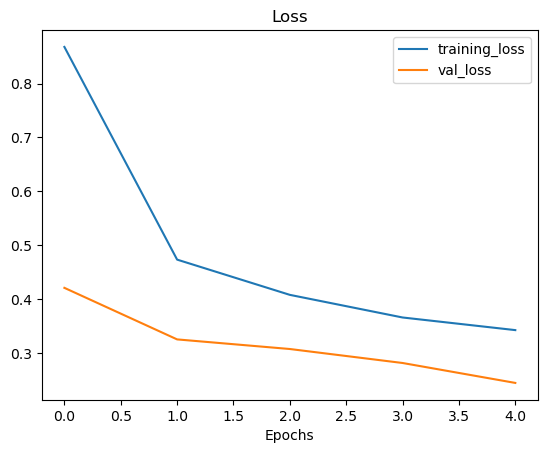

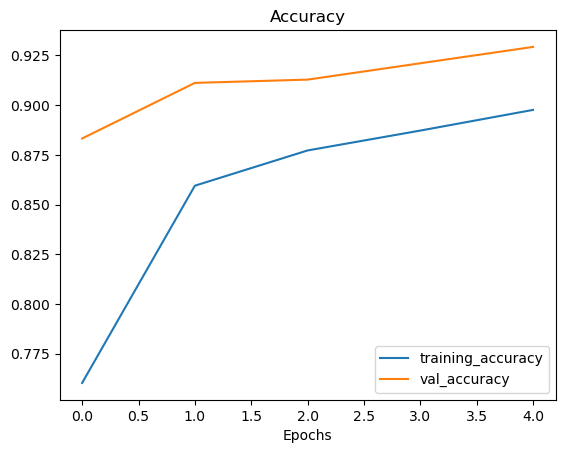

In [17]:
hf.plot_loss_curves(history_model_0)

#### Model 1: Train with augmented images and evaluate model 

In [18]:
# Creates data augmentation layers. One for visualization purpose and other for interaction with main model.
data_augmentation_viz = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip(mode = "horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.Rescaling(1./255)
], name = "augmented_layer_viz")

data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip(mode = "horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    # tf.keras.layers.Rescaling(1./255) # If functional model does not rescale images such as "ResNet", it is necessary to rescaling the data values !
], name = "augmented_layer")

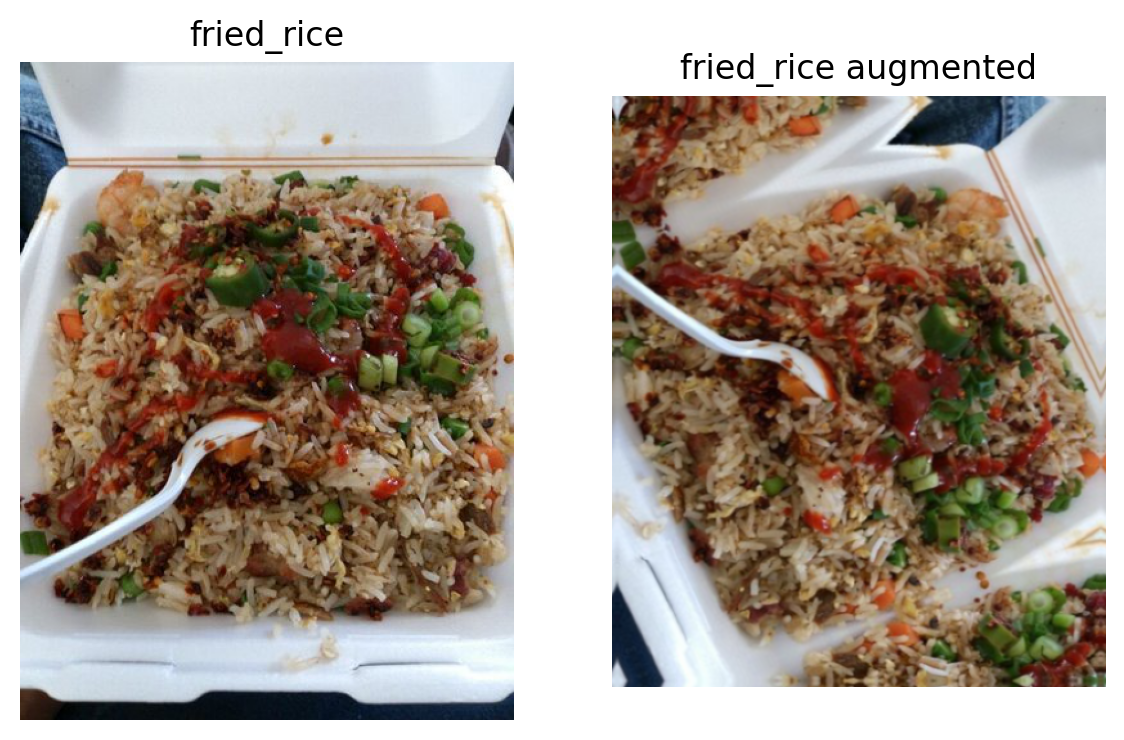

In [19]:
rand_image = hf.random_image(train_dir, train_data.class_names)
img = mpimg.imread(rand_image[1])
augmented_image = data_augmentation_viz(img)

# Plots images.
plt.figure(figsize = (7, 7), dpi = 200) 
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title(f"{rand_image[0]}")
plt.axis(False);
plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title(f"{rand_image[0]} augmented")
plt.axis(False);

In [20]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape = (IMAGE_SIZE + (3, )), name = "input_layer")

# Adds on data augmentation Sequential model as a layer.
x = data_augmentation(inputs)

# Gives base_model inputs (after augmentation) and don't train it.
x = base_model(x, training = False)

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAberagePooling2D: {x.shape}")

outputs = tf.keras.layers.Dense(units = len(train_data.class_names), 
                                activation = "softmax", 
                                name = "output_layer")(x)

model_1 = tf.keras.Model(inputs = inputs, outputs = outputs)

model_1.compile(loss = "categorical_crossentropy", 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ["accuracy"])

initial_epochs = 5

history_model_1 = model_1.fit(train_data, 
                              epochs = initial_epochs, 
                              steps_per_epoch = len(train_data), 
                              validation_data = test_data,
                              validation_steps = int(0.25 * len(test_data)), 
                              callbacks = [hf.create_tensorboard_callback(dir_name = "transfer_learning", 
                                                                          experiment_name = "10_percent_feature_extraction_augmented")])

Shape after GlobalAberagePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction_augmented/20250415-170320
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 93s 361ms/step - accuracy: 0.5227 - loss: 1.4943 - val_accuracy: 0.8701 - val_loss: 0.4822
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 100s 425ms/step - accuracy: 0.7704 - loss: 0.7370 - val_accuracy: 0.8882 - val_loss: 0.3954
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 120s 512ms/step - accuracy: 0.7991 - loss: 0.6386 - val_accuracy: 0.9145 - val_loss: 0.3076
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 131s 559ms/step - accuracy: 0.8180 - loss: 0.5852 - val_accuracy: 0.9030 - val_loss: 0.3366
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 602ms/step - accuracy: 0.8159 - loss: 0.5676 - val_accuracy: 0.9243 - val_loss: 0.2856


In [21]:
model_1.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ augmented_layer (Sequential)    │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, None, None,     │     5,919,312 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,957,744 (22.73 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 25,622 (100.09 KB)

In [22]:
model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 35s 441ms/step - accuracy: 0.9132 - loss: 0.2926


[0.30933281779289246, 0.9020000100135803]

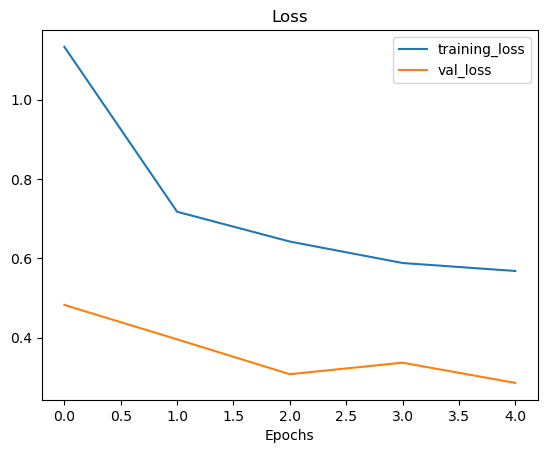

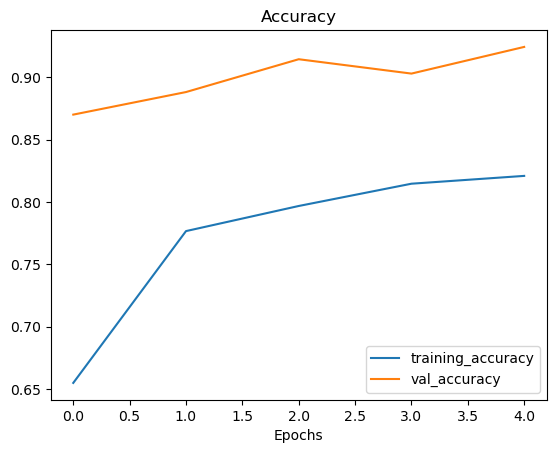

In [23]:
hf.plot_loss_curves(history_model_1)

#### Model 2: Enable the last 10 layers of EfficientNetV2B0

In [24]:
# How many layers are trainable in our model_1?
print(len(model_1.trainable_variables))

2


In [25]:
# Checks which layers are tuneable (trainable) in model_1.
for layer_number, layer in enumerate(model_1.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 augmented_layer True
2 efficientnetv2-b0 False
3 global_average_pooling_layer True
4 output_layer True


In [26]:
# How many of those layers are trainable in base_model => EfficientNetV2B0 ?
print(len(model_1.layers[2].trainable_variables))

0


In [27]:
# Prints all the layers of EfficientNetV2B0.
for layer_number, layer in enumerate(model_1.layers[2].layers):
    print(f"{layer_number} --- {layer.name} --- {layer.trainable}")

0 --- input_layer_2 --- False
1 --- rescaling_2 --- False
2 --- normalization_1 --- False
3 --- stem_conv --- False
4 --- stem_bn --- False
5 --- stem_activation --- False
6 --- block1a_project_conv --- False
7 --- block1a_project_bn --- False
8 --- block1a_project_activation --- False
9 --- block2a_expand_conv --- False
10 --- block2a_expand_bn --- False
11 --- block2a_expand_activation --- False
12 --- block2a_project_conv --- False
13 --- block2a_project_bn --- False
14 --- block2b_expand_conv --- False
15 --- block2b_expand_bn --- False
16 --- block2b_expand_activation --- False
17 --- block2b_project_conv --- False
18 --- block2b_project_bn --- False
19 --- block2b_drop --- False
20 --- block2b_add --- False
21 --- block3a_expand_conv --- False
22 --- block3a_expand_bn --- False
23 --- block3a_expand_activation --- False
24 --- block3a_project_conv --- False
25 --- block3a_project_bn --- False
26 --- block3b_expand_conv --- False
27 --- block3b_expand_bn --- False
28 --- block3b_e

In [28]:
# Making the last 10 layers of base_model (EfficientNetV2B0) "trainable".
for layer in model_1.layers[2].layers[-10:]:
    layer.trainable = True

In [29]:
# Checking the actual trainable layers after changes.
for layer_number, layer in enumerate(model_1.layers[2].layers):
    print(f"{layer_number} --- {layer.name} --- {layer.trainable}")

0 --- input_layer_2 --- False
1 --- rescaling_2 --- False
2 --- normalization_1 --- False
3 --- stem_conv --- False
4 --- stem_bn --- False
5 --- stem_activation --- False
6 --- block1a_project_conv --- False
7 --- block1a_project_bn --- False
8 --- block1a_project_activation --- False
9 --- block2a_expand_conv --- False
10 --- block2a_expand_bn --- False
11 --- block2a_expand_activation --- False
12 --- block2a_project_conv --- False
13 --- block2a_project_bn --- False
14 --- block2b_expand_conv --- False
15 --- block2b_expand_bn --- False
16 --- block2b_expand_activation --- False
17 --- block2b_project_conv --- False
18 --- block2b_project_bn --- False
19 --- block2b_drop --- False
20 --- block2b_add --- False
21 --- block3a_expand_conv --- False
22 --- block3a_expand_bn --- False
23 --- block3a_expand_activation --- False
24 --- block3a_project_conv --- False
25 --- block3a_project_bn --- False
26 --- block3b_expand_conv --- False
27 --- block3b_expand_bn --- False
28 --- block3b_e

In [35]:
# Recompiles the whole model (always recompile after any adjustments to a model).
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), # LR is 10x lower than before for fine-tuning.
                metrics = ["accuracy"])

In [31]:
# Fine tunes for another 5 epochs.
fine_tune_epochs = initial_epochs + 5

history_model_1_fine_aug = model_1.fit(train_data,
                                   epochs = fine_tune_epochs,
                                   validation_data = test_data,
                                   initial_epoch = history_model_1.epoch[-1], # starts from previous last epoch.
                                   validation_steps = int(0.25 * len(test_data)),
                                   callbacks = [hf.create_tensorboard_callback(dir_name = "transfer_learning", 
                                                                               experiment_name = "fine_tune_last_10_aug")]) # name experiment appropriately

Saving TensorBoard log files to: transfer_learning/fine_tune_last_10_aug/20250415-171342
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 229s 934ms/step - accuracy: 0.8104 - loss: 0.6301 - val_accuracy: 0.9112 - val_loss: 0.2887
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 233s 991ms/step - accuracy: 0.8349 - loss: 0.5332 - val_accuracy: 0.9145 - val_loss: 0.2686
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 233s 993ms/step - accuracy: 0.8454 - loss: 0.4955 - val_accuracy: 0.9194 - val_loss: 0.2524
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 229s 974ms/step - accuracy: 0.8514 - loss: 0.4917 - val_accuracy: 0.9326 - val_loss: 0.2301
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.8532 - loss: 0.4594 - val_accuracy: 0.9309 - val_loss: 0.2435
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 244s 1s/step - accuracy: 0.8664 - loss: 0.4261 - val_accuracy: 0.9309 - val_loss: 0.2462


In [32]:
model_1.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ augmented_layer (Sequential)    │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, None, None,     │     5,919,312 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,121,104 (27.16 MB)

 Trainable params: 594,490 (2.27 MB)

 Non-trainable params: 5,337,632 (20.36 MB)

 Optimizer params: 1,188,982 (4.54 MB)

In [33]:
model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 55s 701ms/step - accuracy: 0.9298 - loss: 0.2307


[0.23562490940093994, 0.9236000180244446]

### Comparison of pre-trained history against history of base_model (EfficientNetV2B0) with last 10 layers trained.

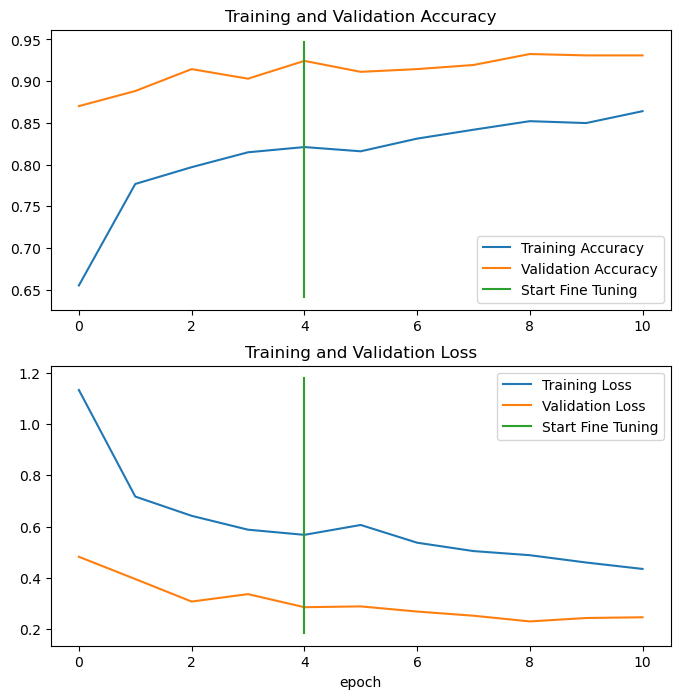

In [34]:
hf.compare_histories(original_history = history_model_1, 
                     new_history = history_model_1_fine_aug, 
                     initial_epochs = initial_epochs)